In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split, KFold

In [55]:
data_folder = os.path.join(os.getcwd(), 'Logs')
files = os.listdir(data_folder)

In [56]:
def find_matching_files(file_list, angle, position):
    for file in file_list:
        # Prüfen, ob der Messwinkel und die Position im Dateinamen enthalten sind
        if f"angle_{angle}" in file and f"pos_{position}" in file:
            matching_file = os.path.join(data_folder, file)
    return matching_file

In [57]:
input_pos = input("Enter Position: ")
input_deg = input("Enter Angle: ")

In [58]:
scan_df = pd.read_csv(find_matching_files(files, input_deg, input_pos))

In [59]:
scan_df

,0.0,11.25,22.5,33.75,45.0,56.25,67.5,78.75,90.0,101.25,...,292.5,303.75,315.0,326.25,337.5,348.75,shape,position,sensor_rotation,angle
0,145,145,145,145,145,145,145,145,148,148,...,141,141,141,141,141,141,cylinder,7,0,11.25
1,141,145,145,145,145,145,145,145,148,148,...,142,141,141,141,141,141,cylinder,7,0,11.25
2,141,145,145,145,145,145,145,145,145,149,...,141,141,141,141,141,141,cylinder,7,0,11.25
3,145,145,145,145,145,145,145,149,148,148,...,141,141,141,141,141,141,cylinder,7,0,11.25
4,145,145,145,145,145,145,145,145,148,148,...,141,141,141,141,141,141,cylinder,7,0,11.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1287,148,148,152,134,134,134,134,134,134,134,...,141,141,141,145,145,145,cylinder,7,0,11.25
1288,148,148,152,134,134,134,134,134,134,134,...,141,141,141,145,145,145,cylinder,7,0,11.25
1289,148,148,152,134,134,134,134,134,134,134,...,141,141,141,145,145,145,cylinder,7,0,11.25
1290,148,148,152,134,134,134,134,134,134,134,...,141,141,141,145,145,145,cylinder,7,0,11.25


In [60]:
scan_data_df = scan_df.iloc[:, :-3]

In [61]:
scan_data_df.to_csv('scan_data.csv', index=False)

In [62]:
scan_data_df.groupby('shape').size()

shape
cube        433
cylinder    429
prisma      430
dtype: int64

In [63]:
X = scan_data_df.drop('shape', axis = 1)
y = scan_data_df['shape']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [64]:
y_encoded = pd.get_dummies(y)

In [88]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Aufteilung in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Modelldefinition
model = Sequential()
model.add(Dense(15, input_dim=X_train.shape[1], activation='relu'))  # Erster verborgener Layer
model.add(Dense(y_encoded.shape[1], activation='softmax'))  # Ausgabelayer

# Modellkompilierung
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training des Modells
history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_test, y_test))

# Bewertung des Modells auf dem Testset
test_loss, test_accuracy = model.evaluate(X_test, y_test)
test_accuracy, test_loss


Epoch 1/500
33/33 [==============================] - 0s 4ms/step - loss: 35.3448 - accuracy: 0.3669 - val_loss: 17.1983 - val_accuracy: 0.3166
Epoch 2/500
33/33 [==============================] - 0s 1ms/step - loss: 17.6644 - accuracy: 0.4414 - val_loss: 15.1996 - val_accuracy: 0.5405
Epoch 3/500
33/33 [==============================] - 0s 1ms/step - loss: 15.2177 - accuracy: 0.4734 - val_loss: 13.2766 - val_accuracy: 0.5792
Epoch 4/500
33/33 [==============================] - 0s 1ms/step - loss: 13.4701 - accuracy: 0.4889 - val_loss: 12.1574 - val_accuracy: 0.5174
Epoch 5/500
33/33 [==============================] - 0s 1ms/step - loss: 11.7526 - accuracy: 0.4966 - val_loss: 11.2634 - val_accuracy: 0.5405
Epoch 6/500
33/33 [==============================] - 0s 1ms/step - loss: 10.4159 - accuracy: 0.5053 - val_loss: 9.4380 - val_accuracy: 0.5367
Epoch 7/500
33/33 [==============================] - 0s 1ms/step - loss: 8.4558 - accuracy: 0.5460 - val_loss: 7.9732 - val_accuracy: 0.6641
Ep

(0.8918918967247009, 0.4510085880756378)

In [92]:
from scikeras.wrappers import KerasClassifier 
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Funktion, die das Keras-Modell erstellt
def create_model(neurons=10, **kwargs):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(y_encoded.shape[1], activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Modell mit KerasClassifier Wrapper
model = KerasClassifier(build_fn=create_model, verbose=0)

# Parameter-Grid definieren
param_grid = {
    'model__neurons': [5, 10, 15, 20],
    'batch_size': [10, 20, 40, 50, 50],
    'epochs': [100, 200, 300]
}

# GridSearch erstellen und ausführen
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train)

# Ergebnisse anzeigen
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))



c:\Users\richa\Documents\PyESP\.venv\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\richa\Documents\PyESP\.venv\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\richa\Documents\PyESP\.venv\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\richa\Documents\PyESP\.venv\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initi

Best: 0.937063 using {'batch_size': 10, 'epochs': 200, 'model__neurons': 20}


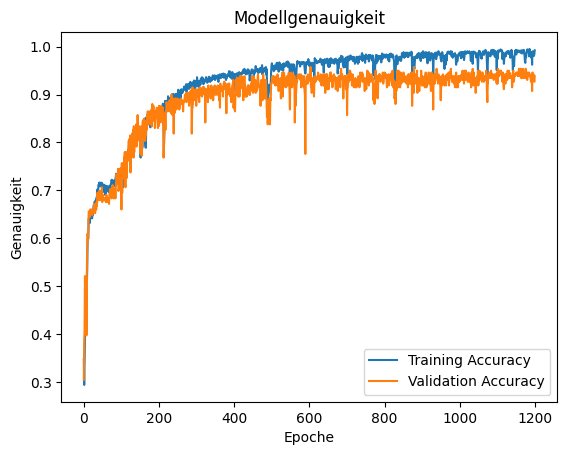

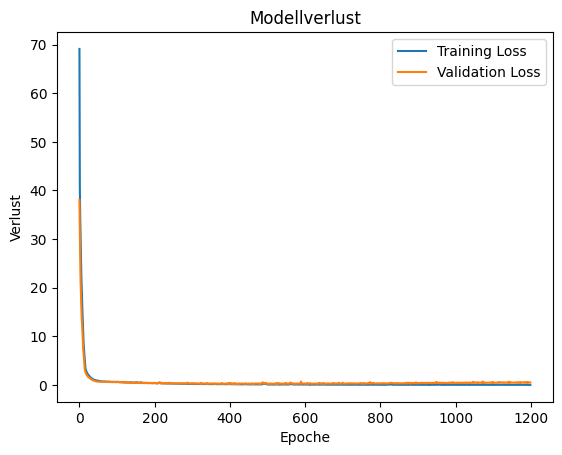

In [87]:
import matplotlib.pyplot as plt

# Visualisierung des Trainingsverlaufs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Modellgenauigkeit')
plt.ylabel('Genauigkeit')
plt.xlabel('Epoche')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Modellverlust')
plt.ylabel('Verlust')
plt.xlabel('Epoche')
plt.legend()
plt.show()


In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Kreuzvalidierungseinstellungen
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Kreuzvalidierung
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Modelldefinition
    model = Sequential()
    model.add(Dense(15, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(y_encoded.shape[1], activation='softmax'))

    # Modellkompilierung
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Training
    model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32)

    # Validierung
    val_loss, val_accuracy = model.evaluate(X_val_fold, y_val_fold)
    print(f'Validierung - Verlust: {val_loss}, Genauigkeit: {val_accuracy}')

# Endgültige Bewertung auf dem Testset
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Endgültige Testgenauigkeit: {test_accuracy}, Verlust: {test_loss}')

Epoch 1/10
26/26 [==============================] - 0s 658us/step - loss: 179.4807 - accuracy: 0.3511
Epoch 2/10
26/26 [==============================] - 0s 601us/step - loss: 69.3534 - accuracy: 0.4455
Epoch 3/10
26/26 [==============================] - 0s 578us/step - loss: 32.6951 - accuracy: 0.4467
Epoch 4/10
26/26 [==============================] - 0s 601us/step - loss: 20.9901 - accuracy: 0.4564
Epoch 5/10
26/26 [==============================] - 0s 560us/step - loss: 18.2499 - accuracy: 0.4177
Epoch 6/10
26/26 [==============================] - 0s 589us/step - loss: 16.4729 - accuracy: 0.4952
Epoch 7/10
26/26 [==============================] - 0s 598us/step - loss: 15.3324 - accuracy: 0.5121
Epoch 8/10
26/26 [==============================] - 0s 542us/step - loss: 14.2258 - accuracy: 0.5061
Epoch 9/10
26/26 [==============================] - 0s 598us/step - loss: 12.9917 - accuracy: 0.4988
Epoch 10/10
7/7 [==============================] - 0s 1ms/step - loss: 12.7456 - accuracy: